In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import torchvision
import os
import collections
import cv2

## some random visualizations

In [23]:
pdf = pd.read_csv("/media/anvuong/Shared/datasets/sudoku-hard/sudoku-hard/train.csv", names=['data','solve'])
data = pdf.values

In [24]:
rand_idx = 0
d, l = data[rand_idx]
# d = list(d)
# l = list(l)

In [5]:
coors = np.linspace(0,1,10)
coors = coors[:-1]
coors_x = coors + 0.04
coors_y = coors + 0.085

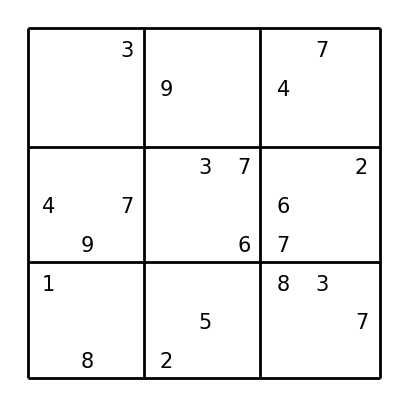

In [6]:
# data
fig = plt.figure(figsize=(5,5))
for r in range(9):
    for c in range(9):
        if d[c+9*r] != '0':
            plt.text(coors_x[c],1-coors_y[r],d[c+9*r], size=15)
plt.vlines(0, 0, 1, color='black', linewidth=2)
plt.vlines(1, 0, 1, color='black', linewidth=2)
plt.vlines(0.33, 0, 1, color='black', linewidth=2)
plt.vlines(0.66, 0, 1, color='black', linewidth=2)

plt.hlines(0, 0, 1, color='black', linewidth=2)
plt.hlines(1, 0, 1, color='black', linewidth=2)
plt.hlines(0.33, 0, 1, color='black', linewidth=2)
plt.hlines(0.66, 0, 1, color='black', linewidth=2)
plt.axis('off')
plt.show()

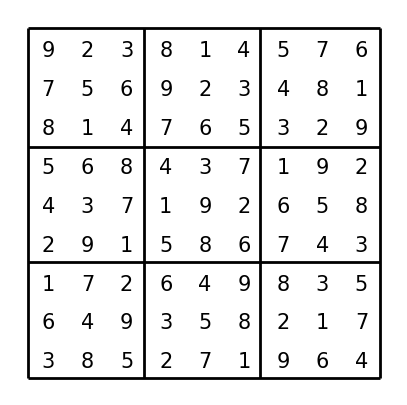

In [7]:
# label
fig = plt.figure(figsize=(5,5))
for r in range(9):
    for c in range(9):
        plt.text(coors_x[c],1-coors_y[r],l[c+9*r], size=15)
plt.vlines(0, 0, 1, color='black', linewidth=2)
plt.vlines(1, 0, 1, color='black', linewidth=2)
plt.vlines(0.33, 0, 1, color='black', linewidth=2)
plt.vlines(0.66, 0, 1, color='black', linewidth=2)

plt.hlines(0, 0, 1, color='black', linewidth=2)
plt.hlines(1, 0, 1, color='black', linewidth=2)
plt.hlines(0.33, 0, 1, color='black', linewidth=2)
plt.hlines(0.66, 0, 1, color='black', linewidth=2)
plt.axis('off')
plt.show()

In [8]:
def mplfig_to_npimage(fig):
    """ Converts a matplotlib figure to a RGB frame after updating the canvas"""
    from matplotlib.backends.backend_agg import FigureCanvasAgg
    canvas = FigureCanvasAgg(fig)
    canvas.draw() # update/draw the elements

    # get the width and the height to resize the matrix
    l,b,w,h = canvas.figure.bbox.bounds
    w, h = int(w), int(h)

    #  exports the canvas to a memory view and then to a numpy nd.array
    mem_view = canvas.buffer_rgba()  # Update to Matplotlib 3.8
    image = np.asarray(mem_view)
    return image[:, :, :3]  # Return only RGB, not alpha.

def get_np(fig):
    numpy_fig = mplfig_to_npimage(fig)  # convert it to a numpy array
    crop = numpy_fig[74:430,78:434,0]
    return crop

In [11]:
crop = get_np(fig)

In [12]:
crop.shape

(356, 356)

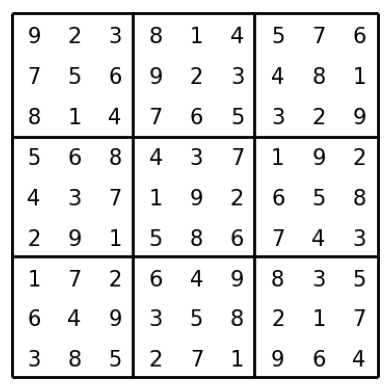

In [13]:
plt.imshow(crop, cmap='gray')
plt.axis('off')
plt.show()

## generate dataset using mnist digit

In [18]:
mnist_path = './data/mnist_png/training'
classes = np.arange(10)
mnist_dict = collections.defaultdict(list)
for c in classes:
    cpath = os.path.join(mnist_path, str(c))
    im_paths = os.listdir(cpath)
    im_paths = [os.path.join(cpath, p) for p in im_paths if p.endswith('.png')]
    for p in im_paths:
        mnist_dict[c].append(cv2.imread(p)[:,:,0])

In [19]:
for c in classes:
    print(c, len(mnist_dict[c]))

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


In [28]:
def make_border(im, size):
    imb = np.ones((size,size))*255
    imb[2:30, 2:30] = im
    return imb

In [29]:
rand_indices = np.random.randint(0, 5000, 81)
size = 32 # make the final image to have size 288x288 -> works with 4 layers Unet
sud = np.zeros((size*9, size*9))
sudl = np.zeros((size*9, size*9))

for r in range(9):
    for c in range(9):
        digitd = int(d[c+9*r])
        mnist_digitd = make_border(mnist_dict[digitd][rand_indices[c+9*r]].copy(), size)
        digitl = int(l[c+9*r])
        mnist_digitl = make_border(mnist_dict[digitl][rand_indices[c+9*r]].copy(), size)

        if digitd == 0:
            mnist_digitd = make_border(np.zeros((28,28)), size)
        sud[r*size:(r+1)*size, c*size:(c+1)*size] = mnist_digitd
        sudl[r*size:(r+1)*size, c*size:(c+1)*size] = mnist_digitl

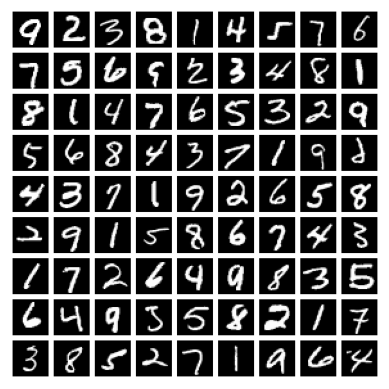

In [30]:
plt.imshow(sudl, cmap='gray')
plt.axis('off')
plt.show()

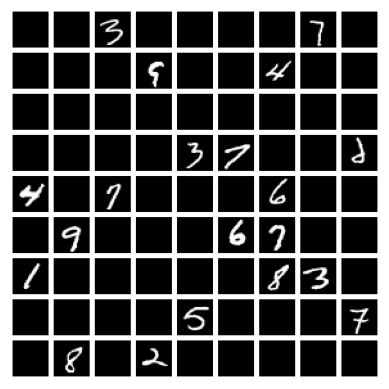

In [31]:
plt.imshow(sud, cmap='gray')
plt.axis('off')
plt.show()

In [33]:
import tqdm

In [40]:
div = 'train'

In [41]:
pdf = pd.read_csv(f"/media/anvuong/Shared/datasets/sudoku-hard/sudoku-hard/{div}.csv", names=['data','solve'])
data = pdf.values

In [42]:
for i, (d,l) in tqdm.tqdm(enumerate(data)):
    rand_indices = np.random.randint(0, 5000, 81)
    size = 32
    sud = np.zeros((size*9, size*9))
    sudl = np.zeros((size*9, size*9))
    
    for r in range(9):
        for c in range(9):
            digitd = int(d[c+9*r])
            mnist_digitd = make_border(mnist_dict[digitd][rand_indices[c+9*r]].copy(), size)
            digitl = int(l[c+9*r])
            mnist_digitl = make_border(mnist_dict[digitl][rand_indices[c+9*r]].copy(), size)
    
            if digitd == 0:
                mnist_digitd = make_border(np.zeros((28,28)), size)
            sud[r*size:(r+1)*size, c*size:(c+1)*size] = mnist_digitd
            sudl[r*size:(r+1)*size, c*size:(c+1)*size] = mnist_digitl
    cv2.imwrite(f'./data/sudoku/{div}/{i}.png',sud)
    cv2.imwrite(f'./data/sudoku/{div}/{i}_label.png',sudl)

180000it [07:58, 376.03it/s]


## view generated data

In [175]:
train_count = 180000
test_count = 18000
valid_cound = 18000

In [176]:
dataset = 'train'
dpath = f'./data/sudoku/{dataset}'

if dataset == 'train':
    rand_idx = np.random.randint(0, train_count)
else:
    rand_idx = np.random.randint(0, test_count)

im_path = f'{rand_idx}.png'
im_label_path = f'{rand_idx}_label.png'
sudoku = cv2.imread(os.path.join(dpath, im_path))
sudoku_label = cv2.imread(os.path.join(dpath, im_label_path))

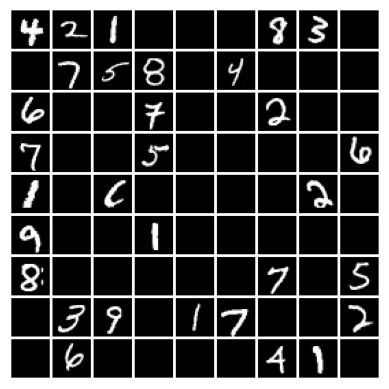

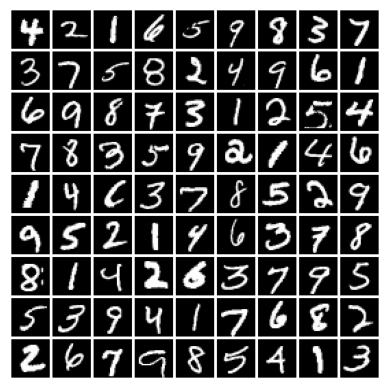

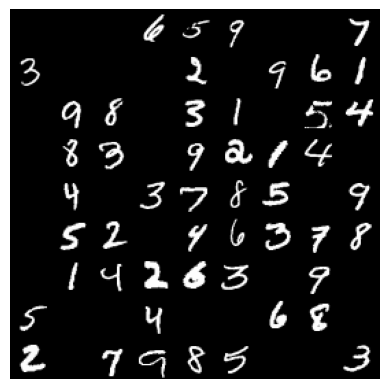

In [177]:
plt.imshow(sudoku)
plt.axis('off')
plt.show()

plt.imshow(sudoku_label)
plt.axis('off')
plt.show()

plt.imshow(sudoku_label-sudoku)
plt.axis('off')
plt.show()

## construct discrete diffusion 

In [178]:
import scipy

In [179]:
def f(x):
    return np.log(x/(1-x))
    
def get_schedule(tEnd, T, sch='linear'):
    if sch == 'linear':
        return np.linspace(0, tEnd, T)
    elif sch == 'blackout':
        #k = np.arange(0, T)
        #tp =  - np.log(expit(logit(1-np.exp(-tEnd)) + (k-1)/(T-1)*(logit(np.exp(-tEnd))-logit(1-np.exp(-tEnd)))))
        # return np.hstack([0, tp])

        xEnd = np.exp(-tEnd)
        fGrid = np.linspace(-f(xEnd), f(xEnd), T)
        xGrid = np.array([scipy.optimize.bisect(lambda x: f(x)-fGrid[i], xEnd/2, 1-xEnd/2) for i in range(T)])
        observationTimes = -np.log(xGrid)
        return np.hstack([0, observationTimes]) # add 0 in the beginning just to fuck with the indices

In [180]:
T = 1000
obs = get_schedule(15, T, 'blackout')

In [181]:
train_count = 180000
test_count = 18000
valid_cound = 18000

In [182]:
dataset = 'train'
dpath = f'./data/sudoku/{dataset}'

if dataset == 'train':
    rand_idx = np.random.randint(0, train_count)
else:
    rand_idx = np.random.randint(0, test_count)

im_path = f'{rand_idx}.png'
im_label_path = f'{rand_idx}_label.png'
xT = sudoku = cv2.imread(os.path.join(dpath, im_path))
x0 = sudoku_label = cv2.imread(os.path.join(dpath, im_label_path))

In [183]:
hist = []
rates= []
diff = x0 - xT
for tk in range(T):
    tp = obs[tk]
    particles = np.random.binomial(diff, 1-np.exp(-tp))
    rates.append(particles)
    xt = x0 - particles
    hist.append(xt)

In [184]:
indices = list(range(0, len(hist), 100)) + [T-1]

# rate_show = np.hstack([r_list[i]/max(1, np.max(r_list[i])) for i in indices])
show_im = np.hstack([hist[i] for i in indices])
show_rates = np.hstack([rates[i] for i in indices])
show = np.vstack([show_im, show_rates])

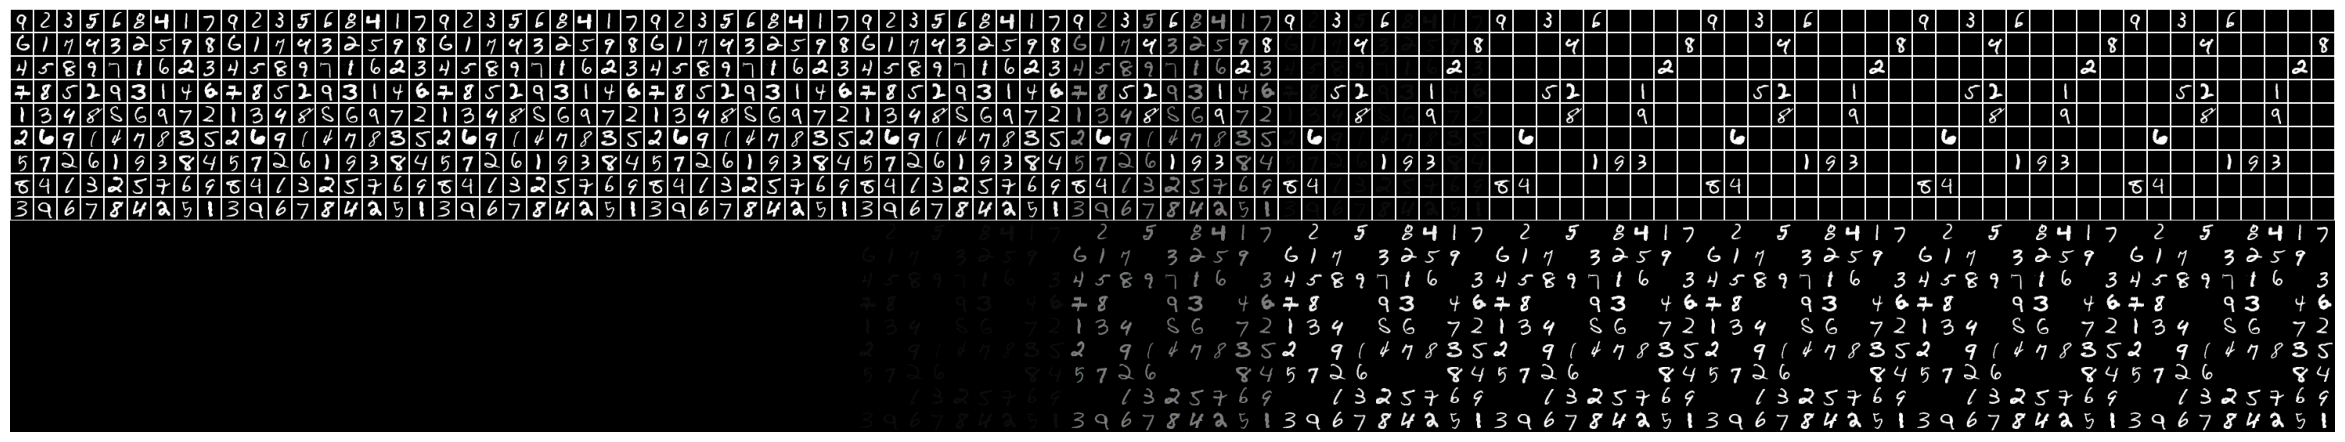

In [185]:
fig = plt.figure(figsize=(30,15))
plt.imshow(show)
plt.axis('off')
plt.show()

In [186]:
hist[0].shape

(270, 270, 3)

## test torch dataset

In [1]:
from datasets import BlackoutSudokuDataset

In [2]:
hparams = {
    'tEnd':15,
    'normalize':False,
    'T':1000,
    'schedule':'blackout',
    'dist': 'uniform'
}

In [3]:
train_d = BlackoutSudokuDataset(True, './data/sudoku/train', hparams)

In [15]:
xt, rate, tk = train_d.__getitem__(0, tk=0)

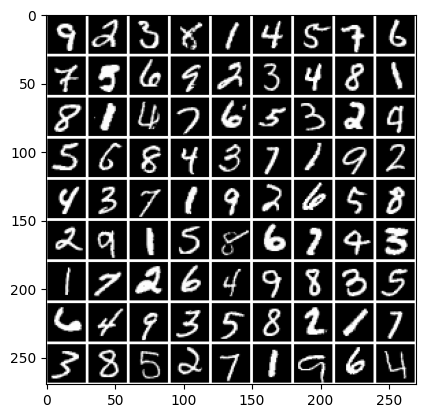

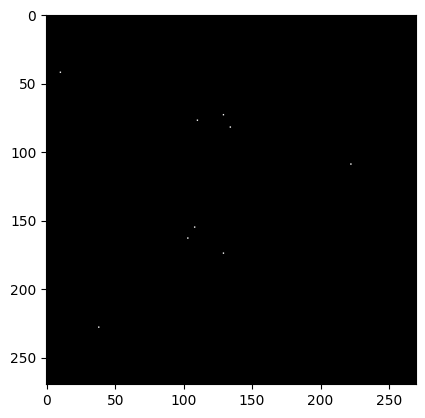

In [16]:
plt.imshow(xt[0], cmap='gray')
plt.show()
plt.imshow(rate[0], cmap='gray')
plt.show()